In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path=r"C:\Users\shree\Downloads\ML\DATA\penguins_size.csv"

In [3]:
df=pd.read_csv(path)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Data Exploration

In [5]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [6]:
df.groupby('species')['island'].value_counts()

species    island   
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: island, dtype: int64

In [7]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Missing Data

In [10]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
df.isna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [4]:
df.drop(df[df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].isnull().all(axis=1)].index, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [17]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [24]:
100*(8/344) #Percentage of missing data

2.3255813953488373

In [86]:
df_copy = df

In [87]:
sex_mapping = {'MALE': 0, 'FEMALE': 1}

# Map the 'sex' column using the defined mapping
df_copy['sex'] = df_copy['sex'].map(sex_mapping)
df_copy

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1.0


In [20]:
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

# Map the 'species' column using the defined mapping
df_copy['species'] = df_copy['species'].map(species_mapping)


In [23]:
df_copy.corr()['species'].sort_values()

C:\Users\shree\AppData\Local\Temp\ipykernel_24708\48288602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()['species'].sort_values()


culmen_depth_mm     -0.744076
sex                 -0.010964
culmen_length_mm     0.731369
body_mass_g          0.750491
flipper_length_mm    0.854307
species              1.000000
Name: species, dtype: float64

In [141]:
df['sex'] = df['sex'].fillna('None')


In [142]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [5]:
df[df['sex']=='None']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [6]:
mean_values = df.groupby(['species', 'sex'])[['body_mass_g', 'culmen_depth_mm', 'flipper_length_mm', 'culmen_length_mm']].mean()
mean_values

body_mass_g  culmen_depth_mm  flipper_length_mm  \
species   sex                                                       
Adelie    FEMALE  3368.835616        17.621918         187.794521   
          MALE    4043.493151        19.072603         192.410959   
Chinstrap FEMALE  3527.205882        17.588235         191.735294   
          MALE    3938.970588        19.252941         199.911765   
Gentoo    .       4875.000000        15.700000         217.000000   
          FEMALE  4679.741379        14.237931         212.706897   
          MALE    5484.836066        15.718033         221.540984   

                  culmen_length_mm  
species   sex                       
Adelie    FEMALE         37.257534  
          MALE           40.390411  
Chinstrap FEMALE         46.573529  
          MALE           51.094118  
Gentoo    .              44.500000  
          FEMALE         45.563793  
          MALE           49.473770

In [7]:
df.at[8, 'sex'] = 'FEMALE'
df.at[9, 'sex'] = 'MALE'
df.at[10, 'sex'] = 'FEMALE'
df.at[11, 'sex'] = 'FEMALE'
df.at[47, 'sex'] = 'FEMALE'
df.at[246, 'sex'] = 'FEMALE'
df.at[286, 'sex'] = 'FEMALE'
df.at[324, 'sex'] = 'FEMALE'

In [8]:
mean_values = df.groupby(['species', 'sex'])[['body_mass_g', 'culmen_depth_mm', 'flipper_length_mm', 'culmen_length_mm']].mean()
mean_values

body_mass_g  culmen_depth_mm  flipper_length_mm  \
species   sex                                                       
Adelie    FEMALE  3368.506494        17.633766         187.623377   
          MALE    4046.283784        19.087838         192.378378   
Chinstrap FEMALE  3527.205882        17.588235         191.735294   
          MALE    3938.970588        19.252941         199.911765   
Gentoo    .       4875.000000        15.700000         217.000000   
          FEMALE  4670.491803        14.234426         212.836066   
          MALE    5484.836066        15.718033         221.540984   

                  culmen_length_mm  
species   sex                       
Adelie    FEMALE         37.233766  
          MALE           40.412162  
Chinstrap FEMALE         46.573529  
          MALE           51.094118  
Gentoo    .              44.500000  
          FEMALE         45.585246  
          MALE           49.473770

# Data Visualization

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

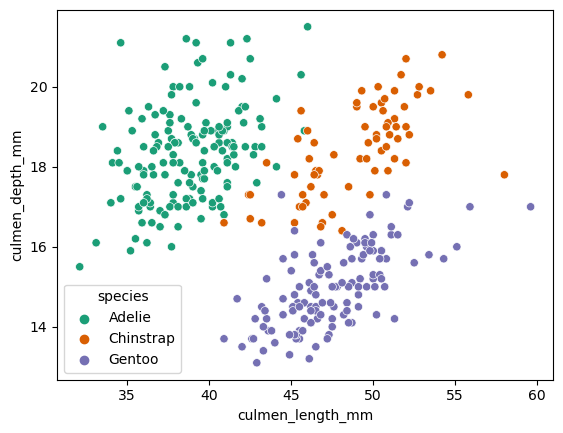

In [33]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

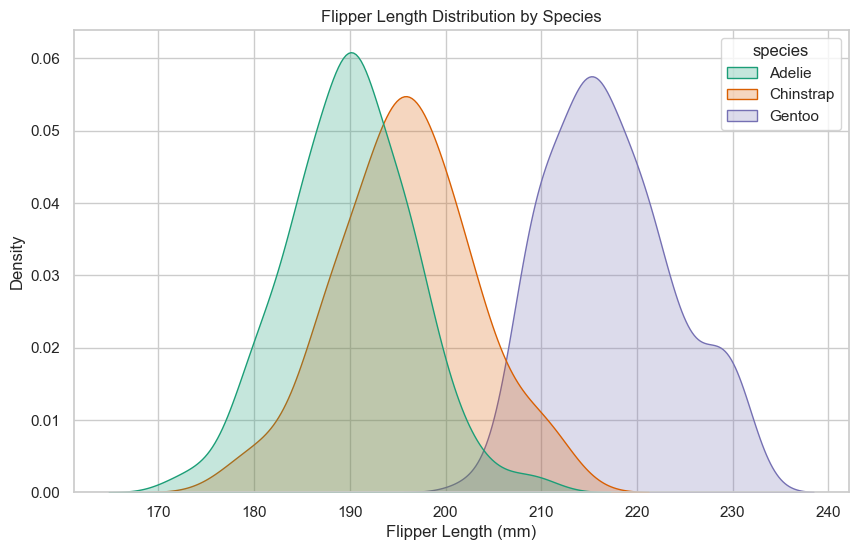

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='flipper_length_mm', hue='species', fill=True, common_norm=False, palette='Dark2')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Density')
plt.title('Flipper Length Distribution by Species')
plt.show()


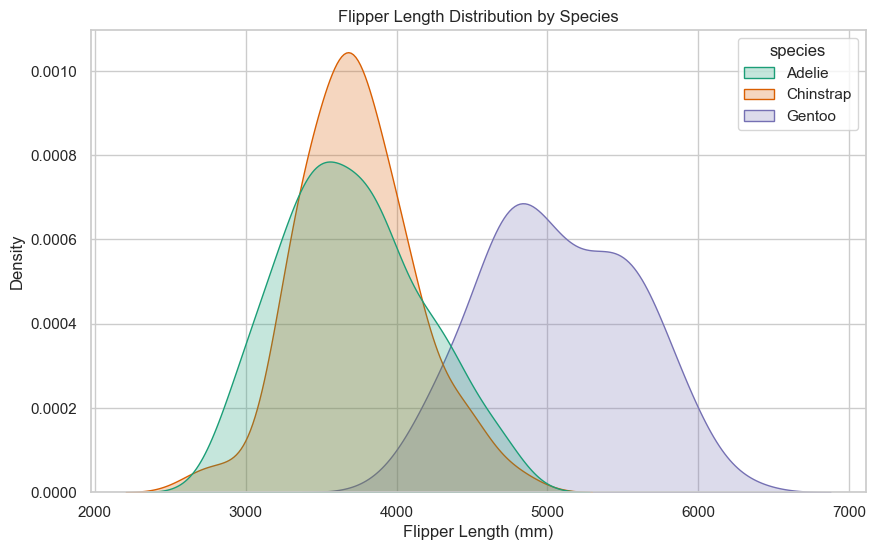

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='body_mass_g', hue='species', fill=True, common_norm=False, palette='Dark2')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Density')
plt.title('Flipper Length Distribution by Species')
plt.show()


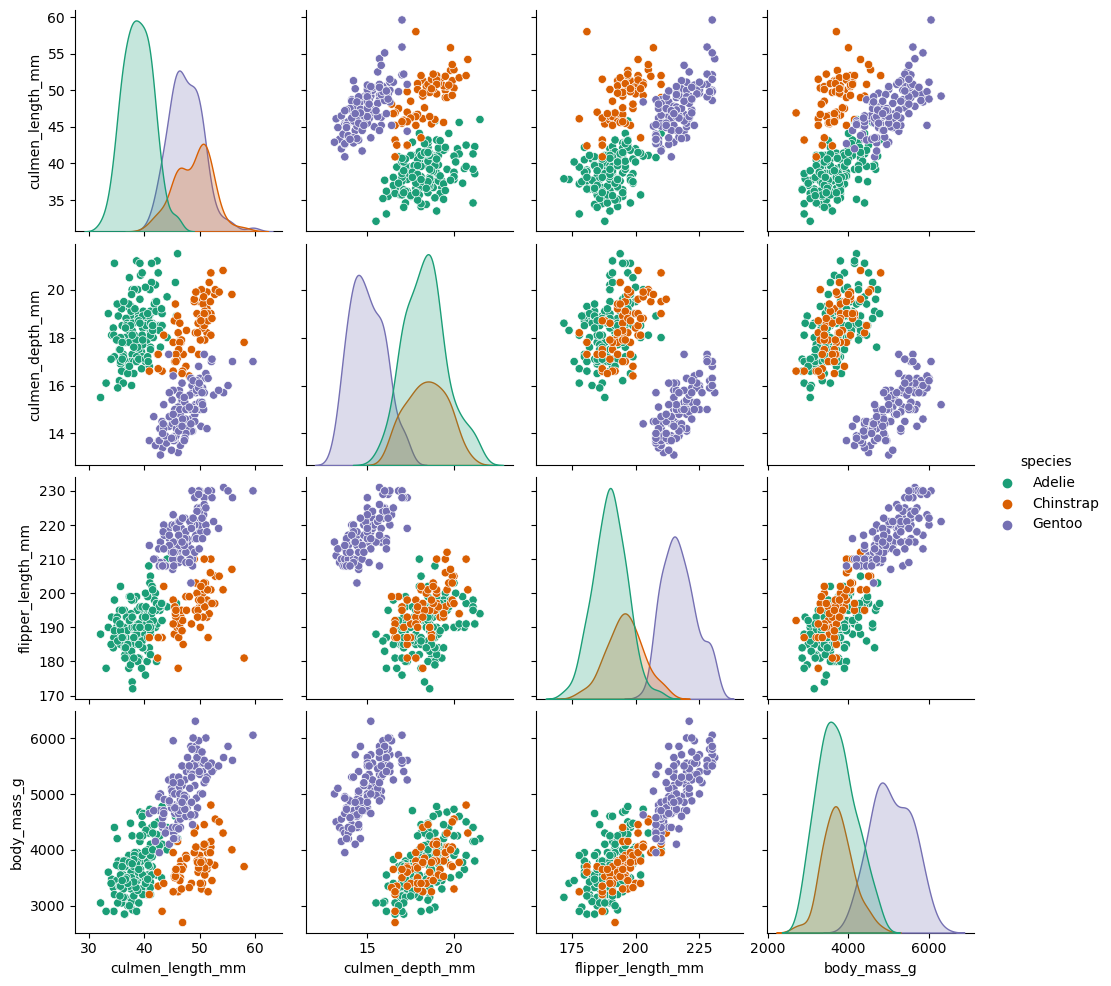

In [34]:
sns.pairplot(df,hue='species',palette='Dark2')

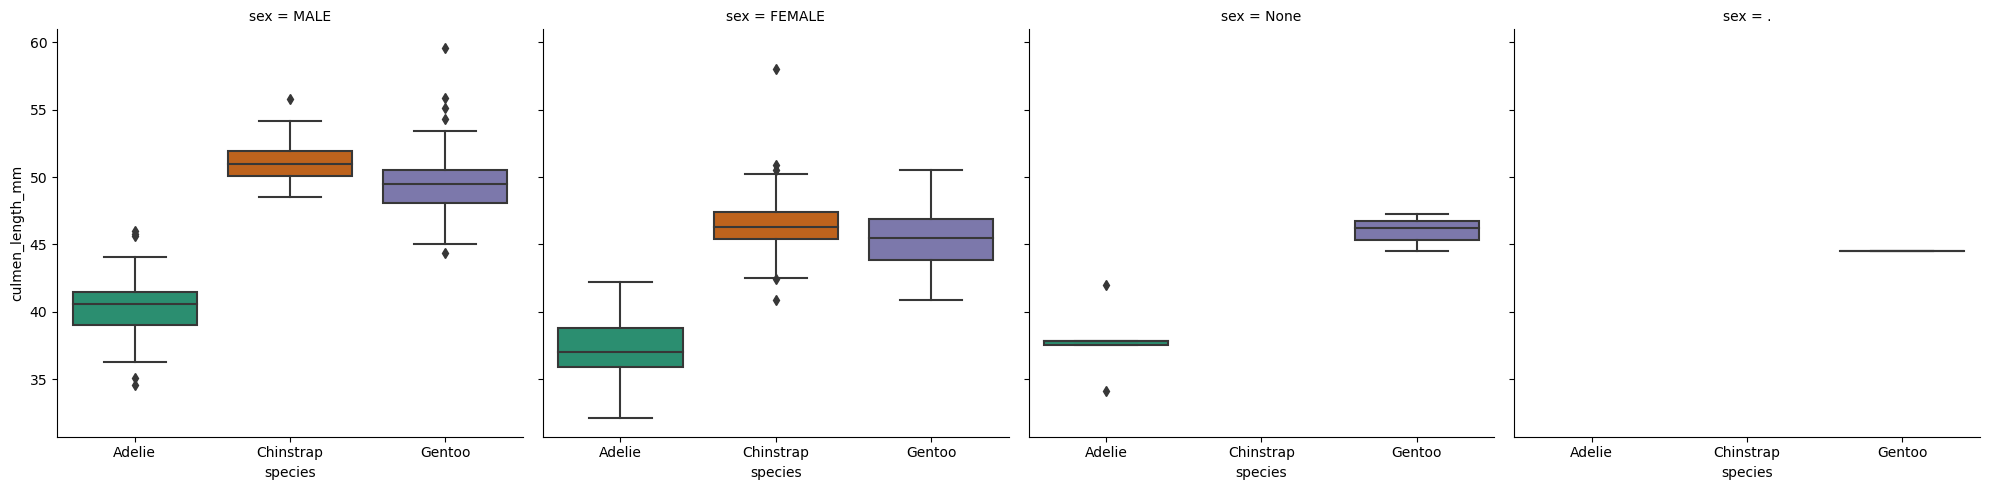

In [35]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

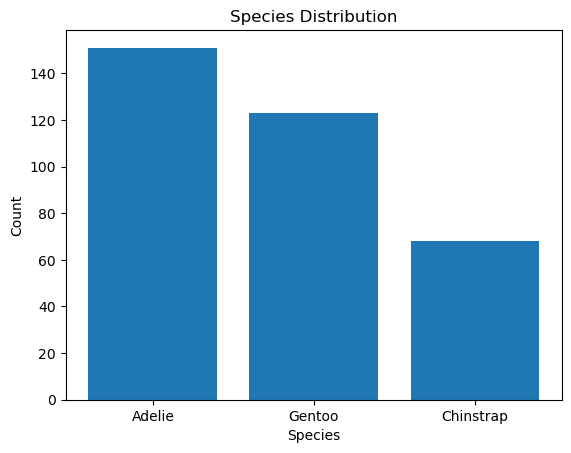

In [36]:
species_counts = df['species'].value_counts()
species_labels = species_counts.index
species_values = species_counts.values

plt.bar(species_labels, species_values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Distribution')
plt.show()

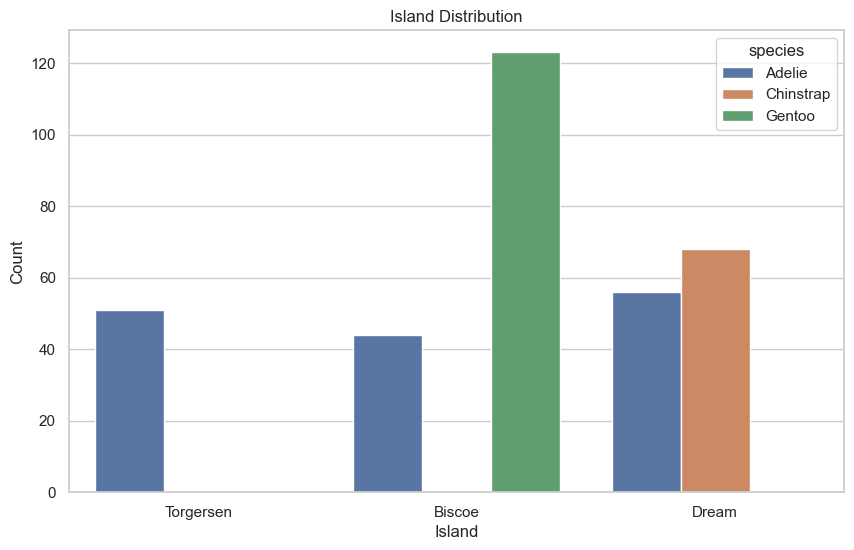

In [41]:
sns.set(style="whitegrid")

# Create a bar plot for island distribution with hue-based coloring
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='island', hue='species', dodge=True)
plt.xlabel('Island')
plt.ylabel('Count')
plt.title('Island Distribution')
plt.show()


# Feature Engineering

In [9]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,0,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,0,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,0,1,0


In [10]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,0


# Train Test Split

In [11]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model + Cross Validation (For Hyperparameter Tuning) + Accuracy Reports

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import plot_tree

In [26]:
def report_model(model):
    model_preds = model.predict(scaled_X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
#     plot_tree(model,filled=True,feature_names=X.columns);

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(scaled_X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
base = DecisionTreeClassifier()
base.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [27]:
report_model(entropy_tree)

              precision    recall  f1-score   support

      Adelie       1.00      0.88      0.94        50
   Chinstrap       0.78      1.00      0.88        18
      Gentoo       0.97      1.00      0.99        35

    accuracy                           0.94       103
   macro avg       0.92      0.96      0.93       103
weighted avg       0.95      0.94      0.94       103





<Figure size 1800x1200 with 0 Axes>

In [28]:
report_model(base)

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        50
   Chinstrap       0.90      1.00      0.95        18
      Gentoo       1.00      0.97      0.99        35

    accuracy                           0.98       103
   macro avg       0.97      0.98      0.97       103
weighted avg       0.98      0.98      0.98       103





<Figure size 1800x1200 with 0 Axes>

In [29]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced', {0: 1, 1: 5}],
}


In [34]:
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

In [35]:
grid_search.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4860 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\shree\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shree\anaconda3\lib\site-pac

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [36]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.9833333333333332


In [41]:
best_dt = grid_search.best_estimator_
report_model(best_dt)

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        50
   Chinstrap       0.86      1.00      0.92        18
      Gentoo       1.00      0.94      0.97        35

    accuracy                           0.97       103
   macro avg       0.95      0.97      0.96       103
weighted avg       0.98      0.97      0.97       103





<Figure size 1800x1200 with 0 Axes>